In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import plotly.express as px
import polars as pl
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x :.2f}')
from cleaner import DataCleaner
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tools import (
    logging,
    bins_generator,
    import_datasets,
    decode_clean_actors,
    decode_clean,
    create_persons_dataframe,
    create_actors_and_directors_dataframe,

)
import eda_movies as eda
clean = DataCleaner()

In [ ]:
# j'ai essayé de lancer ça ça a pris plus de 7 min j'ai give up

# others = test[~test["category"].isin([actors, directors])]

In [23]:
actors = import_datasets("clean_datasets/actors.parquet", "parquet")

2023-10-28 09:28:50 INFO     Parquet loaded ! Importing actors...


In [24]:
directors = import_datasets("clean_datasets/directors.parquet", "parquet")

2023-10-28 09:29:10 INFO     Parquet loaded ! Importing directors...


In [25]:
link = "clean_datasets/person.parquet"
persons = import_datasets(link, "parquet")

2023-10-28 09:29:14 INFO     Parquet loaded ! Importing person...


In [26]:
link = "clean_datasets/movies_cleaned.parquet"
movies = import_datasets(link, "parquet")

2023-10-28 09:29:30 INFO     Parquet loaded ! Importing movies_cleaned...


In [32]:
actors_names = pd.merge(
    actors,
    persons,
    on = "nconst"
)

In [35]:
actors_names.head()

,tconst,ordering,nconst,category,characters,primaryName,birthYear,knownForTitles
0,tt0000001,1,nm1588970,self,[Self],Carmencita,1868,"[tt0057728, tt0000001]"
1,tt0000005,1,nm0443482,actor,[Blacksmith],Charles Kayser,1878,[tt0000005]
2,tt0000005,2,nm0653042,actor,[Assistant],John Ott,1850,[tt0000005]
3,tt0000007,1,nm0179163,actor,[Unknown],James J. Corbett,1866,"[tt0003730, tt0003116, tt0163131, tt0034778]"
4,tt0000147,1,nm0179163,self,[Self],James J. Corbett,1866,"[tt0003730, tt0003116, tt0163131, tt0034778]"


In [36]:
movies_actors = pd.merge(
    actors_names,
    movies,
    left_on = "tconst",
    right_on = "titre_id"
)

In [38]:
movies_actors.drop(["tconst", "titleId"], inplace=True, axis=1)

In [39]:
movies_actors

,ordering,nconst,category,characters,primaryName,birthYear,knownForTitles,titre_id,titre_str,titre_date_sortie,...,rating_votes,original_language,original_title,popularity,production_countries,revenue,spoken_languages,status,region,cuts
0,4,nm0092290,actor,[Homer],Curt Bois,1901,"[tt0034583, tt0093191, tt0048162, tt0042474]",tt0093191,Wings of Desire,1987,...,74744,de,Der Himmel über Berlin,15.04,"[FR, DE]",3210139.00,"[de, en, es, fr, he, ja, tr]",Released,FR,1980-1989
1,1,nm0004486,actor,[Damiel],Bruno Ganz,1941,"[tt0093191, tt0075675, tt2193215, tt0363163]",tt0093191,Wings of Desire,1987,...,74744,de,Der Himmel über Berlin,15.04,"[FR, DE]",3210139.00,"[de, en, es, fr, he, ja, tr]",Released,FR,1980-1989
2,3,nm0761420,actor,[Cassiel],Otto Sander,1941,"[tt0093191, tt0082708, tt0107209, tt0082096]",tt0093191,Wings of Desire,1987,...,74744,de,Der Himmel über Berlin,15.04,"[FR, DE]",3210139.00,"[de, en, es, fr, he, ja, tr]",Released,FR,1980-1989
3,2,nm0231652,actress,[Marion],Solveig Dommartin,1961,"[tt0107209, tt0101458, tt0093191, tt0176836]",tt0093191,Wings of Desire,1987,...,74744,de,Der Himmel über Berlin,15.04,"[FR, DE]",3210139.00,"[de, en, es, fr, he, ja, tr]",Released,FR,1980-1989
4,2,nm0187981,actor,[Jehan Daas],Donald Crisp,1882,"[tt0033729, tt0009968, tt0030287, tt0032145]",tt0052745,A Dog of Flanders,1960,...,444,en,A Dog of Flanders,1.40,[US],0.00,[en],Released,FR,1960-1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144121,3,nm11409296,actor,[Unknown],Freddy Tsimba,0,[tt9787732],tt9787732,System K,2019,...,109,fr,Système K,1.25,"[CD, FR]",0.00,"[fr, ln]",Released,FR,2010-2019
144122,1,nm10505200,self,[Self],Natalina Vó Cândida,0,[tt9843402],tt9843402,Landless,2019,...,219,pt,Chão,1.27,[BR],0.00,[pt],Released,FR,2010-2019
144123,2,nm10505201,self,[Self],Wilmar P.C. Fernandes,0,[tt9843402],tt9843402,Landless,2019,...,219,pt,Chão,1.27,[BR],0.00,[pt],Released,FR,2010-2019
144124,3,nm10505202,self,[Self],Valtenir Gomes,0,[tt9843402],tt9843402,Landless,2019,...,219,pt,Chão,1.27,[BR],0.00,[pt],Released,FR,2010-2019


In [40]:
df = movies_actors.copy()

In [44]:
column_order = [
    "titre_id",
    "titre_str",
    "titre_date_sortie",
    "titre_duree",
    "titre_genres",
    "rating_avg",
    "rating_votes",
    "original_language",
    "original_title",
    "popularity",
    "production_countries",
    "revenue",
    "spoken_languages",
    "status",
    "region",
    "cuts",
    "nconst",
    "category",
    "characters",
    "primaryName",
    "birthYear",
    "knownForTitles",
    "ordering"
]

df = df[column_order]

print(df.head().to_markdown())

|    | titre_id   | titre_str         |   titre_date_sortie |   titre_duree | titre_genres                  |   rating_avg |   rating_votes | original_language   | original_title         |   popularity | production_countries   |     revenue | spoken_languages                     | status   | region   | cuts      | nconst    | category   | characters     | primaryName       |   birthYear | knownForTitles                                    |   ordering |
|---:|:-----------|:------------------|--------------------:|--------------:|:------------------------------|-------------:|---------------:|:--------------------|:-----------------------|-------------:|:-----------------------|------------:|:-------------------------------------|:---------|:---------|:----------|:----------|:-----------|:---------------|:------------------|------------:|:--------------------------------------------------|-----------:|
|  0 | tt0093191  | Wings of Desire   |                1987 |           128 | ['Drama'

In [90]:
df["primaryName"].value_counts()

primaryName
Gérard Depardieu       122
Catherine Deneuve       99
Michel Piccoli          92
Isabelle Huppert        91
Michael Caine           87
                      ... 
Núria Prims              1
Urbanus                  1
Sylvia Millecam          1
Babette van Veen         1
Elizabett Conceição      1
Name: count, Length: 62368, dtype: int64

**JME SUIS ARRETÉ LA**


In [54]:
df.to_parquet("clean_datasets/actors_movies.parquet")

In [3]:
df = pd.read_parquet("clean_datasets/actors_movies.parquet")

In [4]:
condi2 = (
    (df["original_title"].str.contains("Lord of the Ring"))
    # (df["nconst"].str.contains("nm0000367"))
)
df[condi2].head()

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,original_language,original_title,popularity,...,status,region,cuts,nconst,category,characters,primaryName,birthYear,knownForTitles,ordering
42543,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,178,"[Action, Adventure, Drama]",8.80,1951125,en,The Lord of the Rings: The Fellowship of the Ring,74.30,...,Released,FR,2000-2009,nm0005212,actor,[Gandalf],Ian McKellen,1939,"[tt0120684, tt0167260, tt0114279, tt0120737]",2
42544,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,178,"[Action, Adventure, Drama]",8.80,1951125,en,The Lord of the Rings: The Fellowship of the Ring,74.30,...,Released,FR,2000-2009,nm0000293,actor,[Boromir],Sean Bean,1959,"[tt0167261, tt1181791, tt0120737, tt0944947]",4
42545,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,178,"[Action, Adventure, Drama]",8.80,1951125,en,The Lord of the Rings: The Fellowship of the Ring,74.30,...,Released,FR,2000-2009,nm0000704,actor,[Frodo],Elijah Wood,1981,"[tt0120737, tt0167261, tt0167260, tt0338013]",1
42546,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,178,"[Action, Adventure, Drama]",8.80,1951125,en,The Lord of the Rings: The Fellowship of the Ring,74.30,...,Released,FR,2000-2009,nm0089217,actor,[Legolas],Orlando Bloom,1977,"[tt0167260, tt0325980, tt0167261, tt0120737]",3
42547,tt0167260,The Lord of the Rings: The Return of the King,2003,201,"[Action, Adventure, Drama]",9.00,1923018,en,The Lord of the Rings: The Return of the King,65.57,...,Released,FR,2000-2009,nm0005212,actor,[Gandalf],Ian McKellen,1939,"[tt0120684, tt0167260, tt0114279, tt0120737]",3


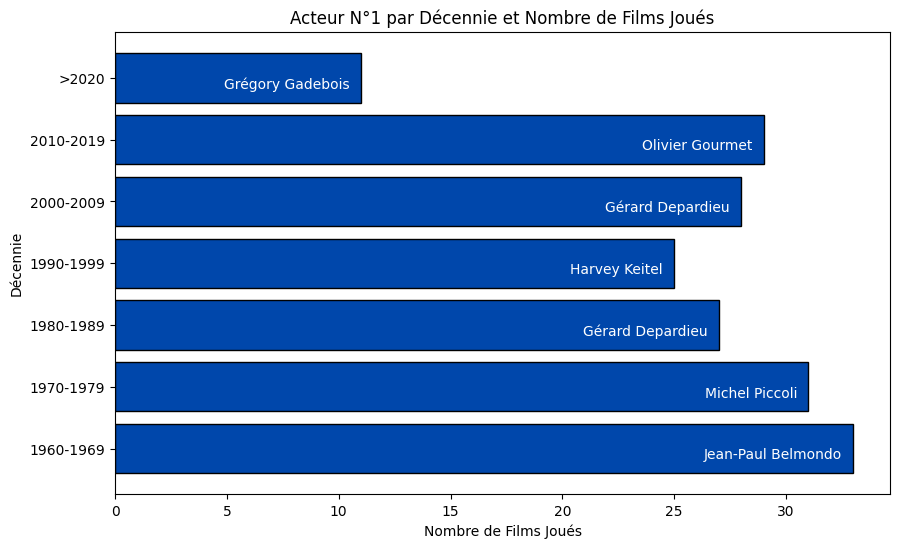

In [89]:
grouped_df = df.groupby(
    ['cuts', 'primaryName']
).size().reset_index(name='total_film_acteurs').sort_values(by="total_film_acteurs")

grouped_df
top_acteurs_decennie = grouped_df.groupby(
    'cuts'
).apply(lambda x: x.nlargest(1, 'total_film_acteurs')).reset_index(drop=True)

decennies = top_acteurs_decennie['cuts']
noms_acteurs = top_acteurs_decennie['primaryName']
nombre_films = top_acteurs_decennie['total_film_acteurs']

plt.figure(figsize=(10, 6))
bars = plt.barh(
    decennies,
    nombre_films,
    color='#0047ab',
    edgecolor="black"
)
for bar, nom in zip(bars, noms_acteurs):
    plt.text(
        # bar.get_width() - 0.5, bar.get_y() + bar.get_height()/2 - 0.1,
        bar.get_width() - 0.5,
        bar.get_y() + bar.get_height()/2 - 0.1,
        # 1,
        # bar,
        f'{nom}',
        va='center',
        ha='right',
        color='white'
    )

plt.title('Acteur N°1 par Décennie et Nombre de Films Joués')
plt.xlabel('Nombre de Films Joués')
plt.ylabel('Décennie')
plt.show()


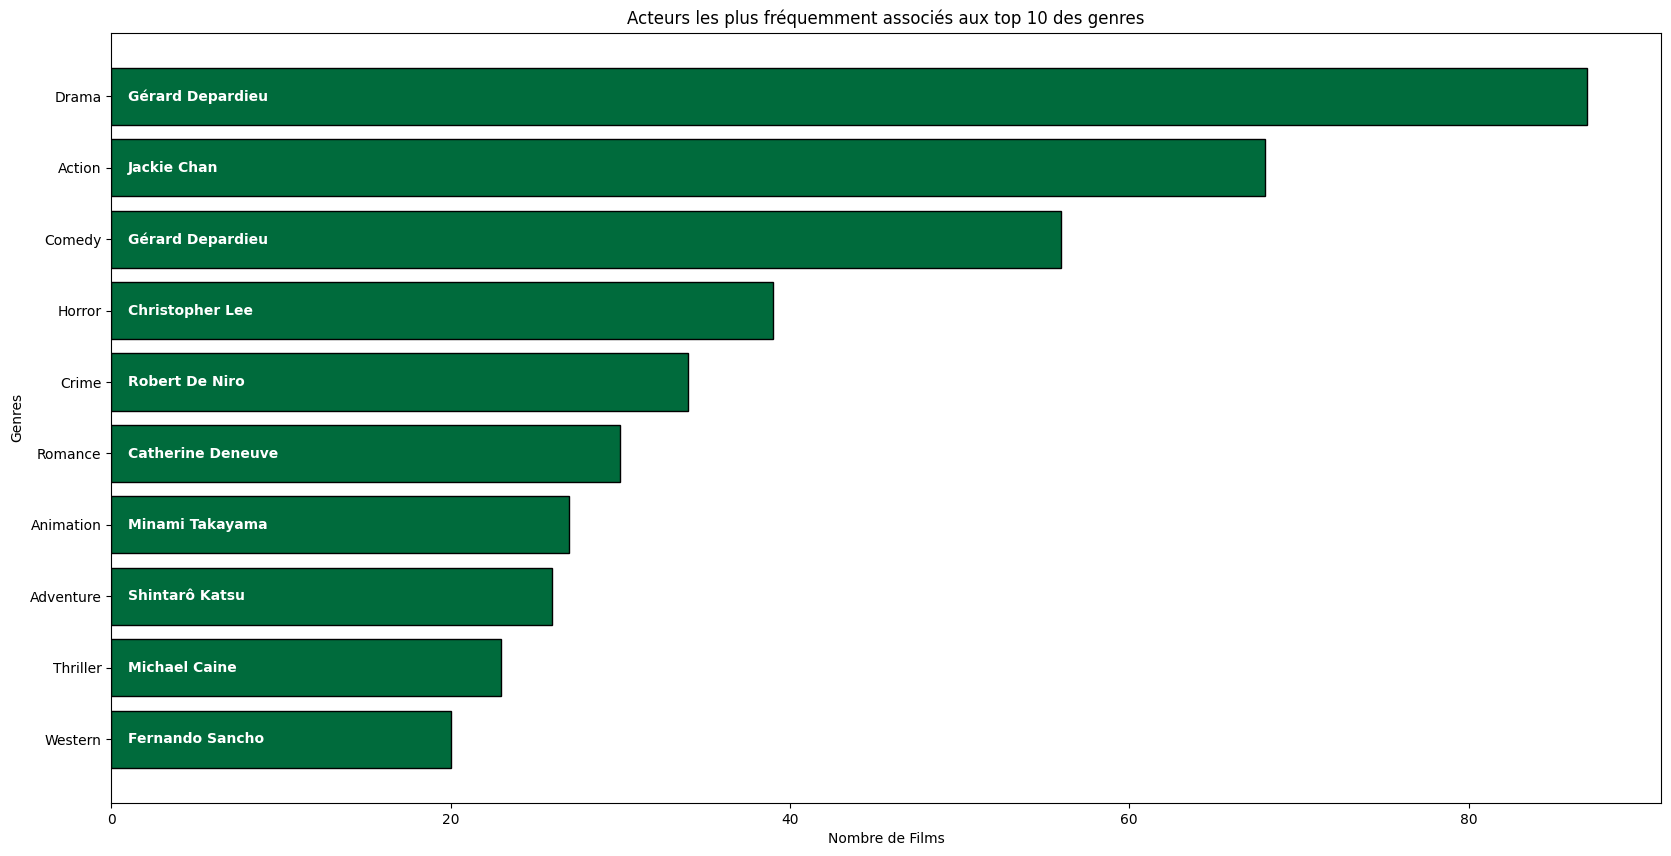

In [87]:
actors_by_genre = df.explode('titre_genres').groupby(['primaryName', 'titre_genres']).size().reset_index(name='count')
top_actors_by_genre = actors_by_genre.sort_values('count', ascending=False).drop_duplicates('titre_genres')[:10][::-1]

# Création du graphique
plt.figure(figsize=(20, 10))
plt.barh(
    top_actors_by_genre['titre_genres'],
    top_actors_by_genre['count'],
    color='#006b3c',
    edgecolor = "black",
)
plt.xlabel('Nombre de Films')
plt.ylabel('Genres')
plt.title('Acteurs les plus fréquemment associés aux top 10 des genres')

for i, (count, name) in enumerate(zip(
    top_actors_by_genre['count'],
    top_actors_by_genre['primaryName'])):
    plt.text(1, i, name, color='white', va='center', ha='left', fontweight='bold')


plt.show()


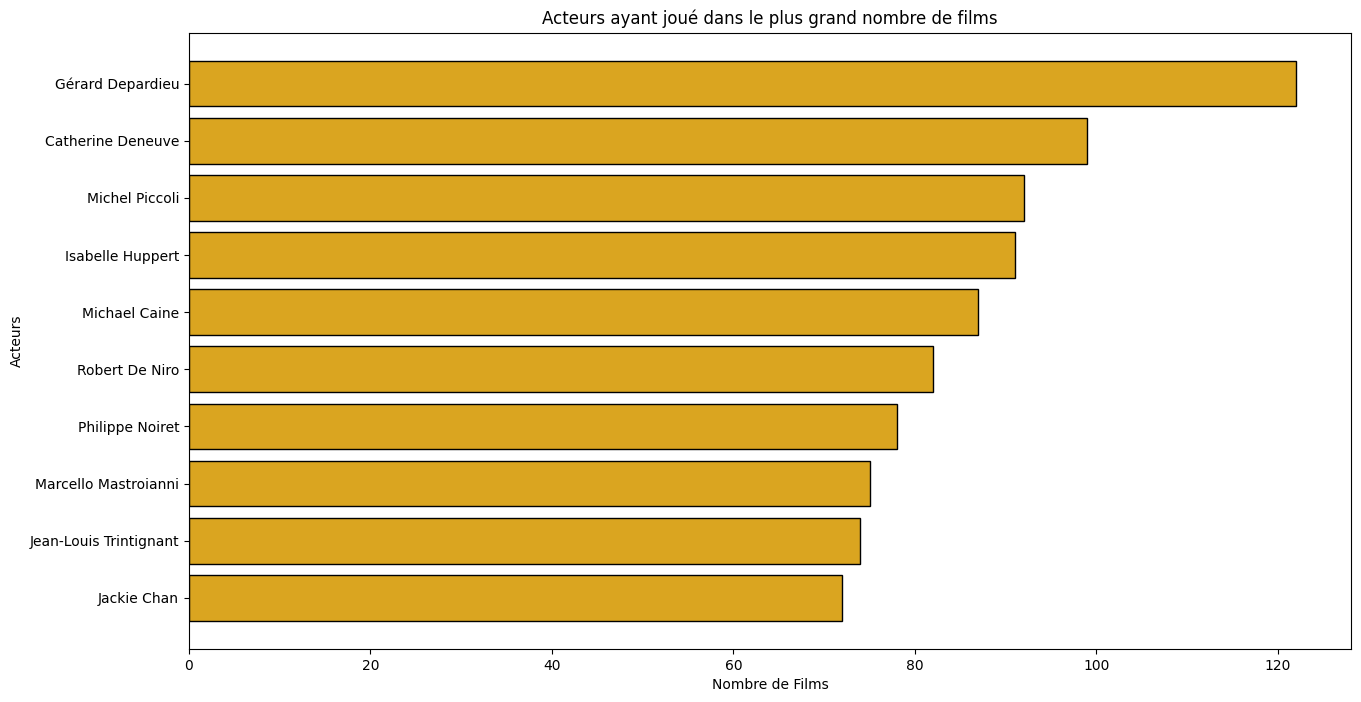

In [77]:
actors_film_count = df.groupby('primaryName').size().reset_index(name='film_count')

top_actors_film_count = actors_film_count.sort_values('film_count', ascending=False).head(10)[::-1]

plt.figure(figsize=(15, 8))
plt.barh(
    top_actors_film_count['primaryName'],
    top_actors_film_count['film_count'],
    color='#daa520',
    edgecolor="black",
)
plt.xlabel('Nombre de Films')
plt.ylabel('Acteurs')
plt.title('Acteurs ayant joué dans le plus grand nombre de films')
plt.show()


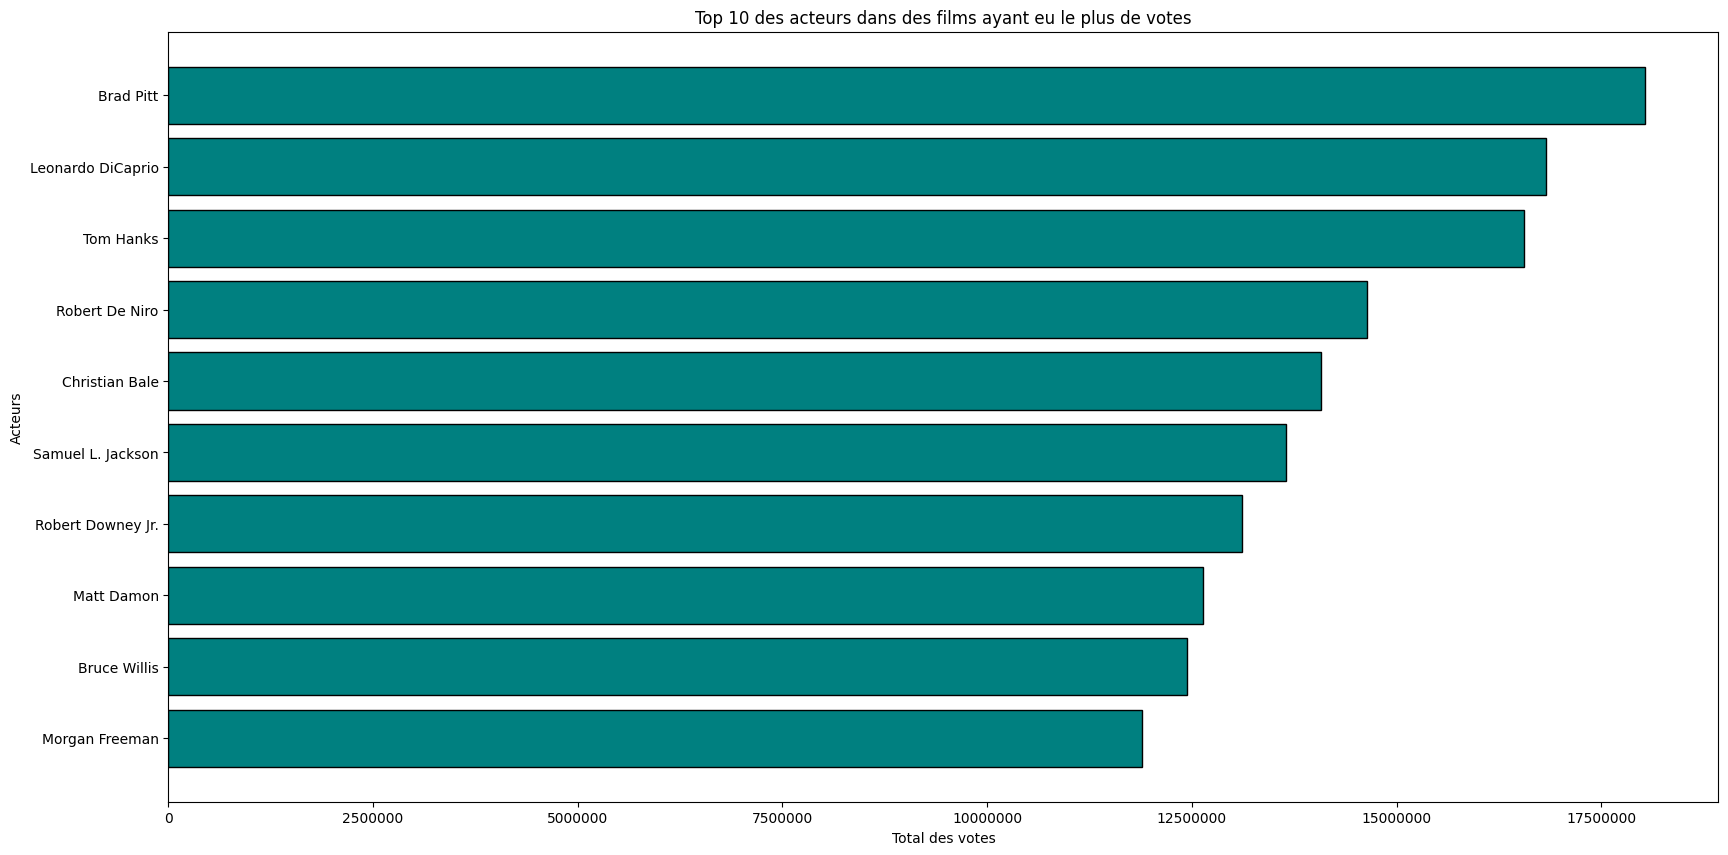

In [76]:
actors_by_votes = df.groupby('primaryName')['rating_votes'].sum().reset_index()

top_actors_by_votes = actors_by_votes.sort_values('rating_votes', ascending=False).head(10)
top_actors_by_votes = top_actors_by_votes[::-1]

plt.figure(figsize=(20, 10))
plt.barh(
    top_actors_by_votes['primaryName'],
    top_actors_by_votes['rating_votes'],
    color='#008080',
    edgecolor =
    "black"
)
plt.xlabel('Total des votes')
plt.ylabel('Acteurs')
plt.title('Top 10 des acteurs dans des films ayant eu le plus de votes')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


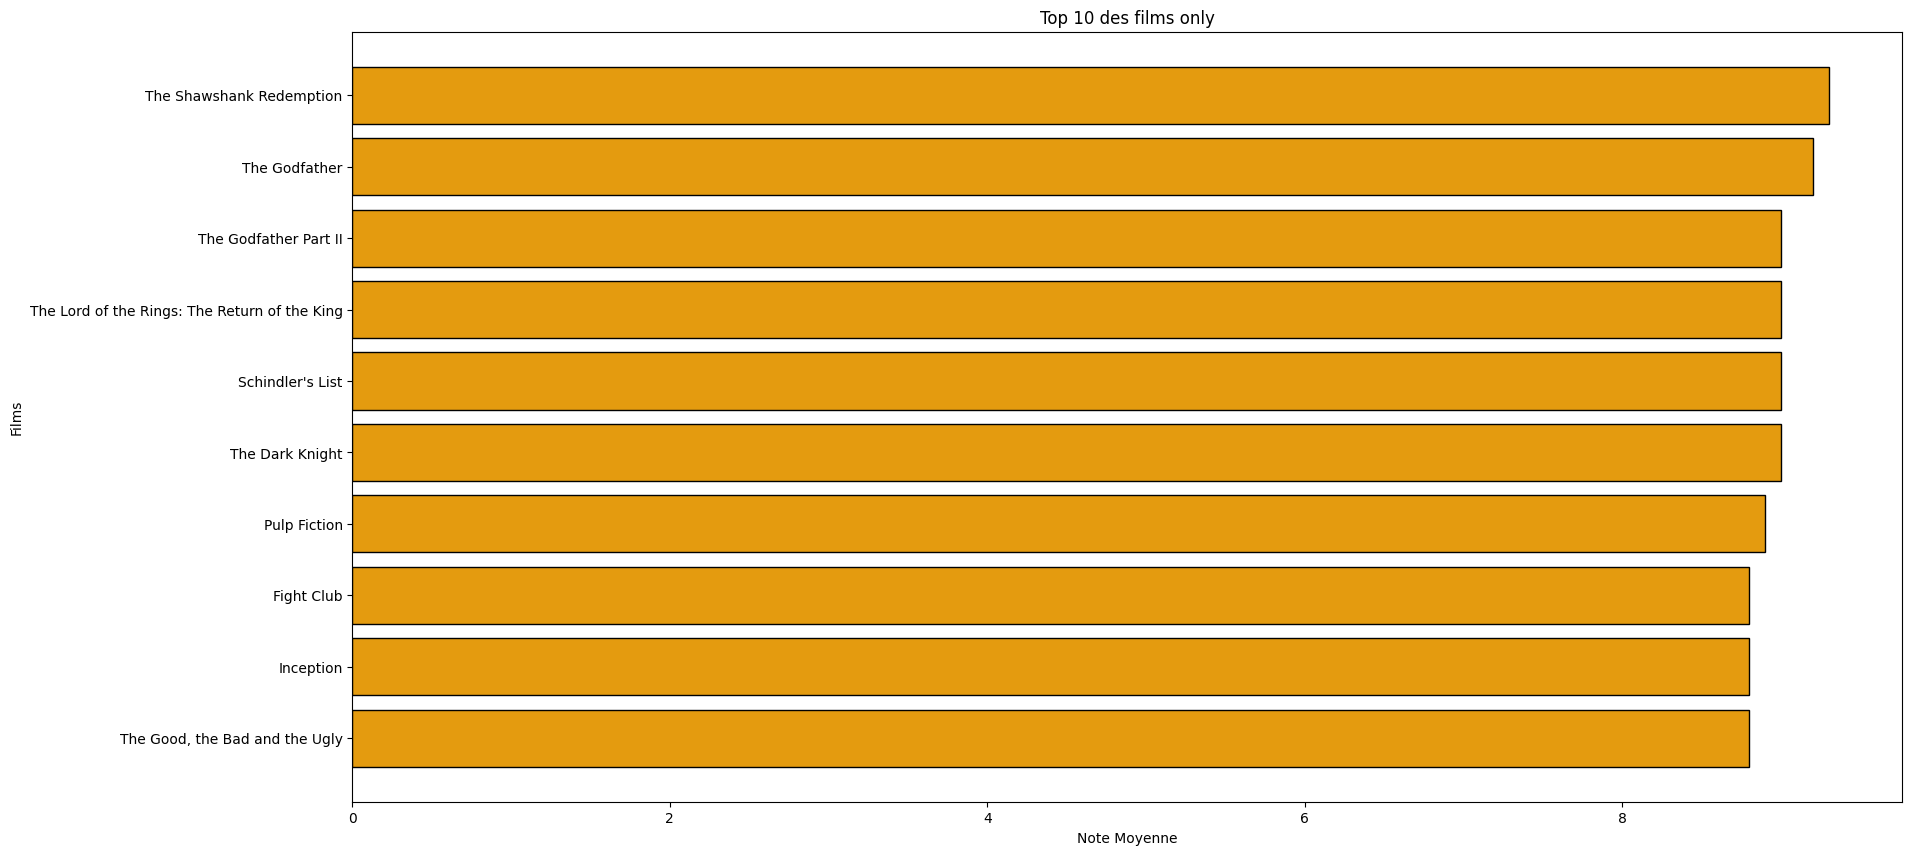

In [150]:
# Je dégage pour les films d'animation les concerts et les docs.
genres_ = ['Animation', 'Music', 'Musical', 'Documentary']
df_filtre = df[df['titre_genres'].apply(lambda x: all(g not in x for g in genres_))]
# Je veux uniquement les films ayant eu le plus de vote, je filtre par quantile 0.75 sup only.
df_filtre = df_filtre[df_filtre['rating_votes'] > df_filtre['rating_votes'].quantile(0.75)]

# Groupe les films par la moyenne ratings, ne prend que le top 10
grouped_films = (
    df_filtre.groupby('titre_str')['rating_avg']
    .mean()
    .reset_index()
    .sort_values("rating_avg", ascending=False)
    .head(10)[::-1]
)

plt.figure(figsize=(20, 10))
plt.barh(
    grouped_films['titre_str'],
    grouped_films['rating_avg'],
    color='#e49b0f',
    edgecolor = "black"
)
plt.xlabel('Note Moyenne')
plt.ylabel('Films')
plt.title('Top 10 des films only')
plt.show()


In [145]:
# Créer un dictionnaire contenant tout les noms des films avec leurs id
titre_dict = df[['titre_id', 'titre_str']].drop_duplicates().set_index('titre_id').to_dict()['titre_str']
# for k, v in titre_dict.items():
#     print(k, v)

In [146]:
df1 = df.copy()

In [147]:
import ast

# Fonction pour remplacer les identifiants dans une liste par les noms de titre
def replace_ids_with_titles(id_list):
    if isinstance(id_list, str):
        id_list = ast.literal_eval(id_list)
    return [titre_dict.get(titre_id, titre_id) for titre_id in id_list]

# Omn créer une nouvelle colonne pour le fun !
df1['person_film'] = df1['knownForTitles'].apply(replace_ids_with_titles)

gerard = df1[df1["primaryName"].str.contains("Gérard Depardieu")]


In [149]:
gerard

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,original_language,original_title,popularity,...,region,cuts,nconst,category,characters,primaryName,birthYear,knownForTitles,ordering,person_film
3814,tt0075848,Bye Bye Monkey,1978,113,"[Comedy, Drama, Fantasy]",6.40,1331,it,Ciao maschio,3.49,...,FR,1970-1979,nm0000367,actor,[Gerard Lafayette],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",1,"[1492: Conquest of Paradise, Green Card, Cyran..."
6467,tt0094828,Camille Claudel,1988,175,"[Biography, Drama, History]",7.20,7167,fr,Camille Claudel,8.11,...,FR,1980-1989,nm0000367,actor,[Auguste Rodin],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",2,"[1492: Conquest of Paradise, Green Card, Cyran..."
9574,tt0078913,Buffet Froid,1979,89,"[Comedy, Crime, Thriller]",7.20,6315,fr,Buffet froid,6.18,...,FR,1970-1979,nm0000367,actor,[Alphonse Tram],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",1,"[1492: Conquest of Paradise, Green Card, Cyran..."
10805,tt0072368,"Vincent, François, Paul and the Others",1974,118,[Drama],7.30,2616,fr,"Vincent, François, Paul et les autres",4.65,...,FR,1970-1979,nm0000367,actor,[Jean Lavallee],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",4,"[1492: Conquest of Paradise, Green Card, Cyran..."
12274,tt0082173,Choice of Arms,1981,135,"[Crime, Drama]",6.90,1969,fr,Le choix des armes,5.99,...,FR,1980-1989,nm0000367,actor,[Mickey],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",2,"[1492: Conquest of Paradise, Green Card, Cyran..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41405,tt5314190,Sgt. Stubby: An American Hero,2018,84,"[Adventure, Animation, Family]",6.90,2480,en,Sgt. Stubby: An American Hero,14.56,...,FR,2010-2019,nm0000367,actor,[Gaston Baptiste],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",3,"[1492: Conquest of Paradise, Green Card, Cyran..."
41409,tt6704974,To the Ends of the World,2018,103,"[Drama, War]",6.30,1189,fr,Les Confins du monde,5.30,...,FR,2010-2019,nm0000367,actor,[Saintonge],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",4,"[1492: Conquest of Paradise, Green Card, Cyran..."
41413,tt6993614,Umami,2022,105,"[Comedy, Drama]",5.70,389,ja,Umami no Tabi,6.70,...,FR,>2020,nm0000367,actor,[Gabriel Carvin],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",1,"[1492: Conquest of Paradise, Green Card, Cyran..."
41417,tt7654872,The Other Woman,2018,84,"[Comedy, Drama, Romance]",5.40,1840,fr,Amoureux de ma femme,8.29,...,FR,2010-2019,nm0000367,actor,[Patrick],Gérard Depardieu,1948,"[tt0103594, tt0099699, tt0099334, tt0120744]",3,"[1492: Conquest of Paradise, Green Card, Cyran..."
